In [155]:
import pandas as pd
from pandas.core.arrays.sparse import SparseArray as _SparseArray
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

In [156]:
df = pd.read_csv('/Users/Ramv/Downloads/netflix.csv')

In [157]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


The goal is to analyze the Netflix dataset to provide data-driven insights on what type of content to produce and how to grow the business. 
Key areas of exploration include understanding the types of content available in different countries, changes in the number of movies released over the last few decades, comparison of TV shows vs. movies, determining the best time to launch a TV show, and analyzing actors/directors across different types of shows/movies. 
Also, we'll assess whether Netflix has been focusing more on TV shows than movies in recent years.

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Observation : From the above data we can observe that column- date_added is in object .so we will change that into date and time dtype.

In [159]:
from datetime import datetime as dt
df["date_added"]=pd.to_datetime(df["date_added"])
df["date_added"].dtype

dtype('<M8[ns]')

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


Features present:

Show_ID-Id of the movie/TV show
type-Movie or TV show
title-Title of the movie/TV show
director-Director of the movie/TV show
Cast-actors/actress who have acted in the movie/TV show
country-Country the movie/TV show belongs to
date_added-Aired dated-Released date on netflix
release year-Original movie/TV show release date
rating-Rating of the movie/TV show
duration-Length of the movie
genre-Genre of the movie
Description-Summary of the movie

In [161]:
df.shape

(8807, 12)

Observation : There are 8807 rows and 12 colomns.

In [162]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Observation : 'director' column has the highest null values followed by columns 'country' and 'cast' at the 2nd and 3rd place respectively.'date_added', 'rating' and 'duration' columns have null values that are negligible.

Unnesting of data that are in list form in the column 'director'

In [163]:
df_dir = pd.DataFrame(df['director'].apply(lambda x: str(x).split(', ')).tolist(), index= df['title'])
df_dir = df_dir.stack().reset_index()
df_dir.drop('level_1', axis = 1, inplace = True)
df_dir.rename(columns = {0:'Director'} , inplace = True)
df_dir.sample(10)
df_dir.shape

(9612, 2)

Unnesting of data that are in list form in the column 'cast'

In [164]:
df_cast = pd.DataFrame(df['cast'].apply(lambda x: str(x).split(', ')).tolist(), index= df['title'])
df_cast = df_cast.stack().reset_index()
df_cast.drop('level_1', axis = 1, inplace = True)
df_cast.rename(columns = {0:'Cast'} , inplace = True)
df_cast.sample(10)
df_cast.shape

(64951, 2)

Unnesting of data that are in list form in the column 'country'

In [165]:
df_co = pd.DataFrame(df['country'].apply(lambda x: str(x).split(', ')).tolist(), index= df['title'])
df_co = df_co.stack().reset_index()
df_co.drop('level_1', axis = 1, inplace = True)
df_co.rename(columns = {0:'Country'} , inplace = True)
df_co.sample(10)
df_co.shape

(10845, 2)

Creating a new dataset by merging the unnested columns

In [183]:
df_new = df.merge(df_dir, on='title').merge(df_cast, on='title').merge(df_co, on='title', how='inner')
df_new.drop(['director', 'cast','country'], axis=1, inplace=True)
df_new

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,Director,Cast,Country
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson,nan,United States
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",nan,Ama Qamata,South Africa
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",nan,Khosi Ngema,South Africa
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",nan,Gail Mabalane,South Africa
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",nan,Thabang Molaba,South Africa
...,...,...,...,...,...,...,...,...,...,...,...,...
89377,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Mozez Singh,Manish Chaudhary,India
89378,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Mozez Singh,Meghna Malik,India
89379,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Mozez Singh,Malkeet Rauni,India
89380,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Mozez Singh,Anita Shabdish,India


Checking if there are any Null values in the unnested columns

In [184]:
df_new['Director'].isnull().any()

False

In [185]:
df_new['Cast'].isnull().any()

False

In [186]:
df_new['Country'].isnull().any()

False

In [187]:
df_new.shape

(89382, 12)

Data clean up: replacing Null values in Director column with Nan and then replace it with 'Not known'

In [188]:
df_new['Director'] = df_new['Director'].replace("nan", np.nan)
df_new['Director']

0        Kirsten Johnson
1                    NaN
2                    NaN
3                    NaN
4                    NaN
              ...       
89377        Mozez Singh
89378        Mozez Singh
89379        Mozez Singh
89380        Mozez Singh
89381        Mozez Singh
Name: Director, Length: 89382, dtype: object

In [189]:
df_new["Director"]=df_new["Director"].fillna("Not known")
df_new.sample(10)

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,Director,Cast,Country
75102,s7516,Movie,Movie 43,2019-04-09,2013,R,94 min,Comedies,An eye-popping cast stars in this sketch-comed...,Rusty Cundieff,Phil Crowley,United States
68516,s6932,Movie,Harriet the Spy: Blog Wars,2018-04-15,2010,TV-G,87 min,"Children & Family Movies, Comedies",Intrepid writer Harriet Welsch is determined t...,Ron Oliver,Jason Blicker,United States
22778,s2124,TV Show,Dérè: An African Tale,2020-08-15,2016,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","After experiencing a tragic loss, a woman must...",Not known,Monica Friday,nan
22108,s2065,TV Show,Borgen,2020-09-01,2012,TV-MA,3 Seasons,"International TV Shows, TV Dramas",A shocking turn of events puts Birgitte Nyborg...,Not known,Thomas Levin,Denmark
83868,s8313,Movie,The Founder,2020-08-21,2016,PG-13,115 min,Dramas,After a fateful encounter with the McDonald br...,John Lee Hancock,Ric Reitz,Greece
46313,s4623,TV Show,Reboot: The Guardian Code,2018-09-28,2018,TV-Y7,2 Seasons,Kids' TV,Four tech-savvy teens hone their skills as cyb...,Not known,Nicholas Lea,Canada
74825,s7516,Movie,Movie 43,2019-04-09,2013,R,94 min,Comedies,An eye-popping cast stars in this sketch-comed...,Griffin Dunne,John Hodgman,United States
84860,s8395,Movie,The Little Mermaid,2018-12-01,2018,PG,85 min,"Children & Family Movies, Dramas","In this take on the classic tale, a captive ci...",Chris Bouchard,Tom Nowicki,United States
54798,s5587,Movie,Mike Birbiglia: Thank God for Jokes,2017-02-28,2017,TV-MA,71 min,Stand-Up Comedy,Comedian Mike Birbiglia takes the stage in Bro...,Mike Birbiglia,Mike Birbiglia,United States
27604,s2596,Movie,Thomas & Friends: Thomas and the Royal Engine,2020-05-01,2020,TV-Y,23 min,Children & Family Movies,An invitation from the Queen sends Thomas and ...,Joey So,Joseph May,nan


Data clean up: replacing Null values in Country column with Nan and then replace it with 'Not known'

In [190]:
df_new['Cast'] = df_new['Cast'].replace("nan", np.nan)
df_new['Cast']

0                          NaN
1                   Ama Qamata
2                  Khosi Ngema
3                Gail Mabalane
4               Thabang Molaba
                 ...          
89377         Manish Chaudhary
89378             Meghna Malik
89379            Malkeet Rauni
89380           Anita Shabdish
89381    Chittaranjan Tripathy
Name: Cast, Length: 89382, dtype: object

In [191]:
df_new["Cast"]=df_new["Cast"].fillna("Not Known")
df_new.sample(10)

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,Director,Cast,Country
11484,s1035,Movie,Synchronic,2021-04-16,2020,R,102 min,Thrillers,Two paramedics begin to question their realiti...,Justin Benson,Katie Aselton,United States
65951,s6689,Movie,Emma' (Mother),2018-10-05,2016,TV-PG,74 min,"Dramas, International Movies","In 1950s Makassar, the life of a devoted mothe...",Riri Riza,Irmawati Jabbar,Indonesia
4722,s427,Movie,Cousins,2021-07-22,2021,TV-MA,99 min,Dramas,"Separated as children, three cousins with an u...",Briar Grace-Smith,Hariata Moriarty,New Zealand
29391,s2778,TV Show,Unorthodox,2020-03-26,2020,TV-MA,1 Season,"International TV Shows, TV Dramas",A Hasidic Jewish woman in Brooklyn flees to Be...,Not known,Alex Reid,Germany
73685,s7418,Movie,Mary Poppins Returns,2019-07-09,2018,PG,131 min,"Children & Family Movies, Music & Musicals","In 1930s London, Michael Banks and his three c...",Rob Marshall,Colin Firth,United Kingdom
88778,s8758,Movie,World Trade Center,2019-11-20,2006,PG-13,129 min,"Action & Adventure, Dramas","Working under treacherous conditions, an army ...",Oliver Stone,Viola Davis,United States
71939,s7226,Movie,Kraftidioten,2017-01-05,2014,TV-MA,117 min,"Comedies, International Movies, Thrillers","When he sets out to avenge his son's murder, m...",Hans Petter Moland,Jakob Oftebro,Sweden
49793,s4998,TV Show,Borderliner,2018-03-06,2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","To protect his family, a police detective cove...",Not known,Tobias Santelmann,Sweden
71472,s7194,Movie,Kicking and Screaming,2019-11-04,1995,R,97 min,"Comedies, Independent Movies, Romantic Movies","After graduating, four college roomies – petri...",Noah Baumbach,Cara Buono,United States
47317,s4716,Movie,Flavors of Youth: International Version,2018-08-04,2018,TV-PG,74 min,"Anime Features, International Movies, Romantic...","Memories in a bowl of steaming noodles, a fadi...",Yoshitaka Takeuchi,Minako Kotobuki,China


In [192]:
df_new["Country"]=df_new["Country"].fillna("Not Known")
df_new.sample(10)

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,Director,Cast,Country
76150,s7632,Movie,Nymphomaniac: Volume II,2018-08-25,2013,TV-MA,124 min,"Dramas, Independent Movies, International Movies",The second half of Lars von Trier's epic follo...,Lars von Trier,Stacy Martin,Germany
68630,s6947,Movie,Head Count,2019-09-13,2018,TV-MA,90 min,"Horror Movies, Independent Movies",A group of college students on a weekend getaw...,Elle Callahan,Hunter Peterson,United States
41665,s4074,Movie,Four Sisters and a Wedding,2019-02-27,2013,TV-14,125 min,"Comedies, Dramas, International Movies",Four sisters unite to stop their young brother...,Cathy Garcia-Molina,Enchong Dee,Philippines
20806,s1931,Movie,Poacher,2020-09-30,2018,TV-MA,28 min,"Dramas, International Movies, Thrillers",A daring farmer steals illicit ivory from a gr...,Tom Whitworth,Peter King,United Kingdom
6387,s567,Movie,Charlie's Angels,2021-07-01,2000,PG-13,98 min,"Action & Adventure, Comedies",A tight-knit trio of specially trained agents ...,McG,Kelly Lynch,United States
61475,s6259,TV Show,Be-Be-Bears,2018-08-29,2018,TV-Y,1 Season,Kids' TV,"Bear buddies Bucky and Bjorn play games, go on...",Not known,Polina Kutepova,Russia
17755,s1633,Movie,Spookley and the Christmas Kittens,2020-11-30,2019,TV-Y,45 min,Children & Family Movies,When a green cat and three stray kittens wind ...,Bernie Denk,Sonja Ball,United States
31081,s2942,TV Show,Locke & Key,2020-02-07,2020,TV-14,1 Season,"TV Action & Adventure, TV Dramas, TV Mysteries","After their dad's murder, three siblings move ...",Not known,Laysla De Oliveira,Canada
55995,s5717,TV Show,Paranoid,2016-11-17,2016,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Internationa...",When a woman is brutally murdered on a playgro...,Not known,Robert Glenister,United Kingdom
83319,s8267,Movie,The Dark Crystal,2019-05-01,1982,PG,93 min,Children & Family Movies,"In this mythical tale, Jen, the last of the Ge...",Frank Oz,Jim Henson,United Kingdom


Checking if there are columns that needs to be clened for null values

In [193]:
df_new.isnull().sum()

show_id          0
type             0
title            0
date_added      69
release_year     0
rating          38
duration         3
listed_in        0
description      0
Director         0
Cast             0
Country          0
dtype: int64

Observation: date_added, rating and duration are the columns that need to be cleaned up.

Data Clean up: replacing the null values with median date value.

In [194]:
df_new["date_added"].fillna(df_new["date_added"].median(),inplace=True)

In [195]:
df_new['date_added'] = pd.to_datetime(df_new['date_added'])
df_new['date_added']

0       2021-09-25
1       2021-09-24
2       2021-09-24
3       2021-09-24
4       2021-09-24
           ...    
89377   2019-03-02
89378   2019-03-02
89379   2019-03-02
89380   2019-03-02
89381   2019-03-02
Name: date_added, Length: 89382, dtype: datetime64[ns]

Data clean up: replacing Null values in rating column & replace it with 'Not known'

In [196]:
df_new["rating"]=df_new["rating"].fillna("Not Known")

Data clean up: replacing Null values in duration column & replace it with 'Not known'

In [197]:
null_duration_rows = df_new[df_new['duration'].isnull()]
null_duration_rows

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,Director,Cast,Country
54463,s5542,Movie,Louis C.K. 2017,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",Louis C.K.,Louis C.K.,United States
56605,s5795,Movie,Louis C.K.: Hilarious,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,Louis C.K.,Louis C.K.,United States
56673,s5814,Movie,Louis C.K.: Live at the Comedy Store,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,Louis C.K.,Louis C.K.,United States


In [198]:
df_new.loc[null_duration_rows.index, 'duration'] = null_duration_rows['rating']
df_new.loc[null_duration_rows.index, 'rating'] = 'Not known'

In [199]:
df_new.isnull().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
Director        0
Cast            0
Country         0
dtype: int64

Observation: The datatset is totally free of null values after the clean up.

In [210]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89382 entries, 0 to 89381
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       89382 non-null  object        
 1   type          89382 non-null  object        
 2   title         89382 non-null  object        
 3   date_added    89382 non-null  datetime64[ns]
 4   release_year  89382 non-null  int64         
 5   rating        89382 non-null  object        
 6   duration      89382 non-null  object        
 7   listed_in     89382 non-null  object        
 8   description   89382 non-null  object        
 9   Director      89382 non-null  object        
 10  Cast          89382 non-null  object        
 11  Country       89382 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 10.9+ MB


After un-nesting the dataset is again grouped to get only the unique rows based on the title.

In [213]:
df_grouped = df_new.groupby('title').agg({
    'Director': lambda x: ', '.join(set(x.dropna())),  # Combine unique directors
    'Cast': lambda x: ', '.join(set(x.dropna())),      # Combine unique cast members
    'Country': lambda x: ', '.join(set(x.dropna())),   # Combine unique countries
    'duration': 'first',                               # Assume duration is the same for all rows
    'release_year': 'first',                           # Assume release year is the same for all rows
    'rating': 'first',                                 # Assume rating is the same for all rows
    'date_added': 'first',                             # Assume date added is the same for all rows
    'listed_in': 'first', 
    'type': 'first'# Assume genres are the same for all rows
}).reset_index()

df_grouped

,title,Director,Cast,Country,duration,release_year,rating,date_added,listed_in,type
0,#Alive,Cho Il,"Park Shin-hye, Yoo Ah-in",South Korea,99 min,2020,TV-MA,2020-09-08,"Horror Movies, International Movies, Thrillers",Movie
1,#AnneFrank - Parallel Stories,"Anna Migotto, Sabina Fedeli","Helen Mirren, Gengher Gatti",Italy,95 min,2019,TV-14,2020-07-01,"Documentaries, International Movies",Movie
2,#FriendButMarried,Rako Prijanto,"Beby Tsabina, Sari Nila, Vanesha Prescilla, Re...",Indonesia,102 min,2018,TV-G,2020-05-21,"Dramas, International Movies, Romantic Movies",Movie
3,#FriendButMarried 2,Rako Prijanto,"Vonny Cornellya, Sari Nila, Mawar de Jongh, Ad...",Indonesia,104 min,2020,TV-G,2020-06-28,"Dramas, International Movies, Romantic Movies",Movie
4,#Roxy,Michael Kennedy,"Booboo Stewart, Jake Short, Sarah Fisher, Pipp...",Canada,105 min,2018,TV-14,2019-04-10,"Comedies, Romantic Movies",Movie
...,...,...,...,...,...,...,...,...,...,...
8802,忍者ハットリくん,Not known,Not Known,Japan,2 Seasons,2012,TV-Y7,2018-12-23,"Anime Series, Kids' TV",TV Show
8803,海的儿子,Not known,"Jeanette Aw, Apple Hong, Christopher Lee, Jess...",nan,1 Season,2016,TV-14,2018-04-27,"International TV Shows, TV Dramas",TV Show
8804,마녀사냥,Not known,"Dong-yup Shin, Sam Hammington, Se-yoon Yoo, Ji...",South Korea,1 Season,2015,TV-MA,2018-02-19,"International TV Shows, Korean TV Shows, Stand...",TV Show
8805,반드시 잡는다,Hong-seon Kim,Baek Yoon-sik,South Korea,110 min,2017,TV-MA,2018-02-28,"Dramas, International Movies, Thrillers",Movie


Cleaned dataset df_grouped will be used for EDA

In [215]:
df_grouped["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

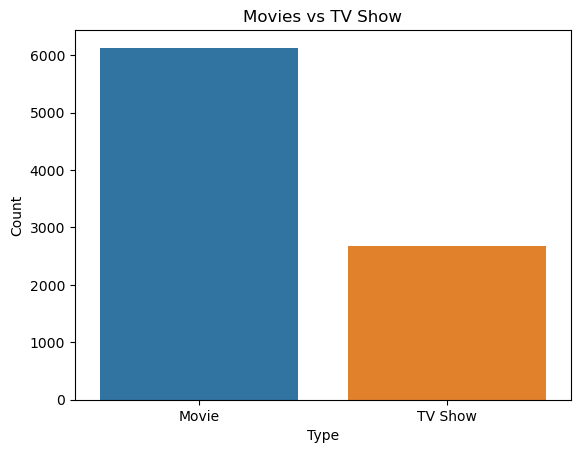

In [219]:
sns.countplot(x="type",data=df_grouped)
plt.title('Movies vs TV Show')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [222]:
movies = df_grouped[df_grouped['type'] == 'Movie']
tv_shows = df_grouped[df_grouped['type'] == 'TV Show']
movies_by_country = movies.groupby('Country')['title'].nunique().sort_values(ascending=False).head(10)
tv_shows_by_country = tv_shows.groupby('Country')['title'].nunique().sort_values(ascending=False).head(10)
movies_by_country
tv_shows_by_country

Country
United States     760
nan               391
United Kingdom    213
Japan             169
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Spain              48
Name: title, dtype: int64

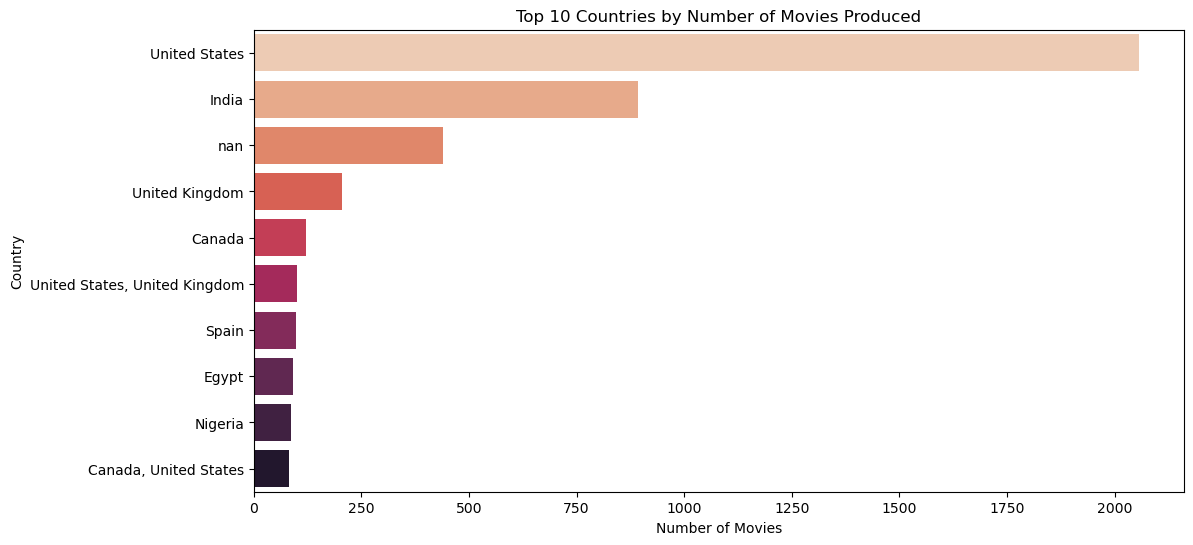

In [224]:
plt.figure(figsize=(12, 6))
sns.barplot(x=movies_by_country.values, y=movies_by_country.index, palette='rocket_r')
plt.title('Top 10 Countries by Number of Movies Produced')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.show()

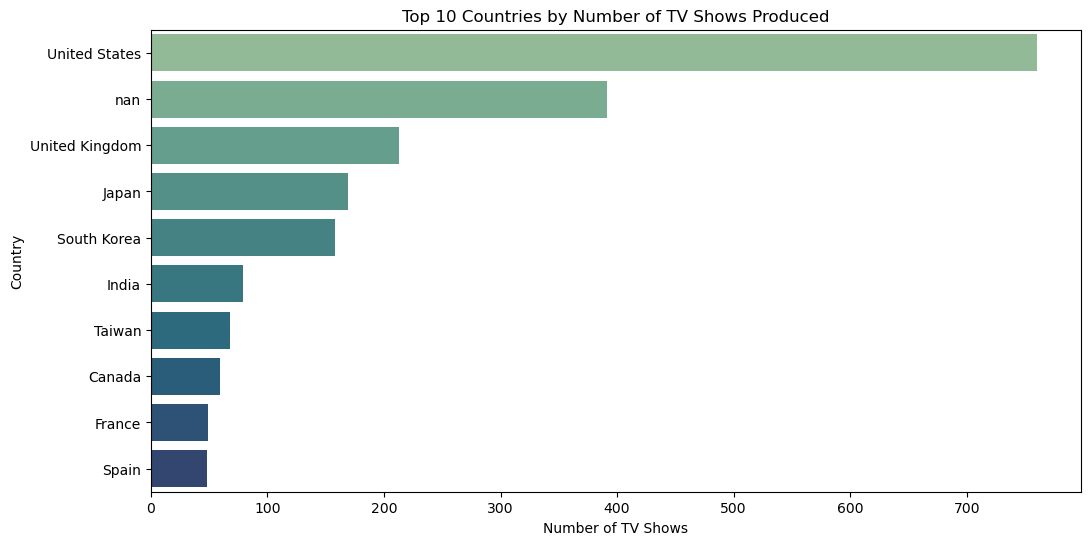

In [226]:
plt.figure(figsize=(12, 6))
sns.barplot(x=tv_shows_by_country.values, y=tv_shows_by_country.index, palette='crest')
plt.title('Top 10 Countries by Number of TV Shows Produced')
plt.xlabel('Number of TV Shows')
plt.ylabel('Country')
plt.show()

In [227]:
df_grouped['date_added'] = pd.to_datetime(df_grouped['date_added'])
# Extract week and month from 'date_added'
df_grouped['Week'] = df_grouped['date_added'].dt.isocalendar().week
df_grouped['Month'] = df_grouped['date_added'].dt.month

In [229]:
# Separate movies and TV shows
movies = df_grouped[df_grouped['type'] == 'Movie']
tv_shows = df_grouped[df_grouped['type'] == 'TV Show']

# Group by week and count the total number of movies
movies_by_week = movies.groupby('Week')['title'].count().sort_values(ascending=False)

# Group by month and count the total number of movies
movies_by_month = movies.groupby('Month')['title'].count().sort_values(ascending=False)
movies_by_week
movies_by_month

Month
7     565
4     550
12    547
1     546
10    545
3     529
8     519
9     519
11    498
6     492
5     439
2     382
Name: title, dtype: int64

Observation:There is no one month were the movies released are significantly higher than the rest of the months.

In [231]:
# Group by week and count the total number of TV shows
tv_shows_by_week = tv_shows.groupby('Week')['title'].count().sort_values(ascending=False)

# Group by month and count the total number of TV shows
tv_shows_by_month = tv_shows.groupby('Month')['title'].count().sort_values(ascending=False)
tv_shows_by_week
tv_shows_by_month

Month
12    266
7     262
9     261
6     236
8     236
10    215
4     214
3     213
11    207
5     193
1     192
2     181
Name: title, dtype: int64

Observation:There is no one month were the TV Shows released are significantly higher than the rest of the months.

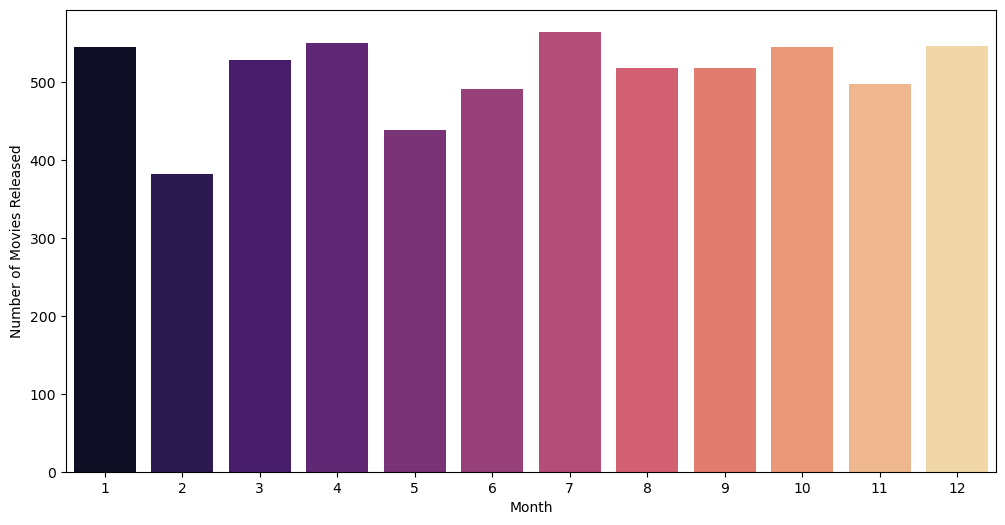

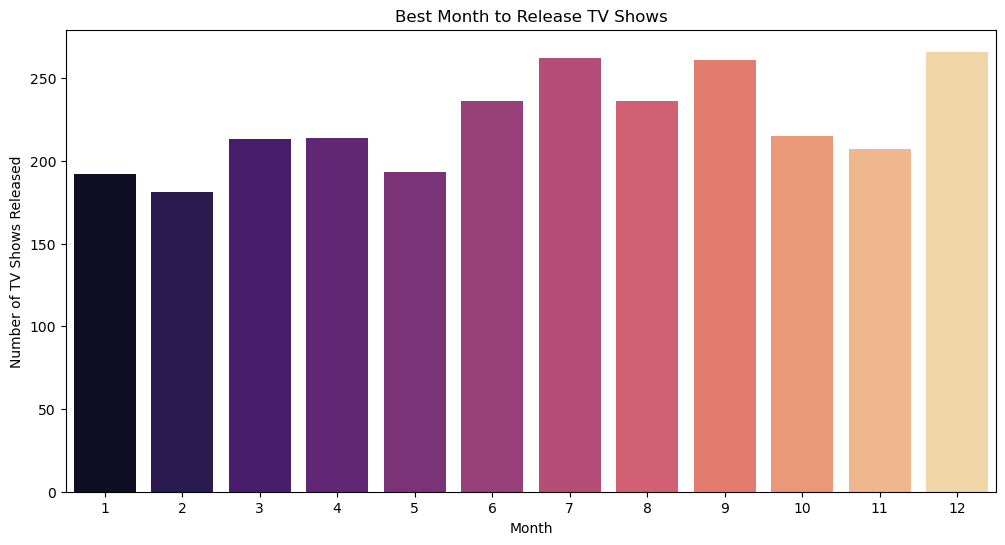

In [263]:
# Plotting the best month to release movies
plt.figure(figsize=(12, 6))
sns.barplot(x=movies_by_month.index, y=movies_by_month.values, palette='magma')
plt.xlabel('Month')
plt.ylabel('Number of Movies Released')
plt.show()

# Plotting the best month to release TV shows
plt.figure(figsize=(12, 6))
sns.barplot(x=tv_shows_by_month.index, y=tv_shows_by_month.values, palette='magma')
plt.title('Best Month to Release TV Shows')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows Released')
plt.show()


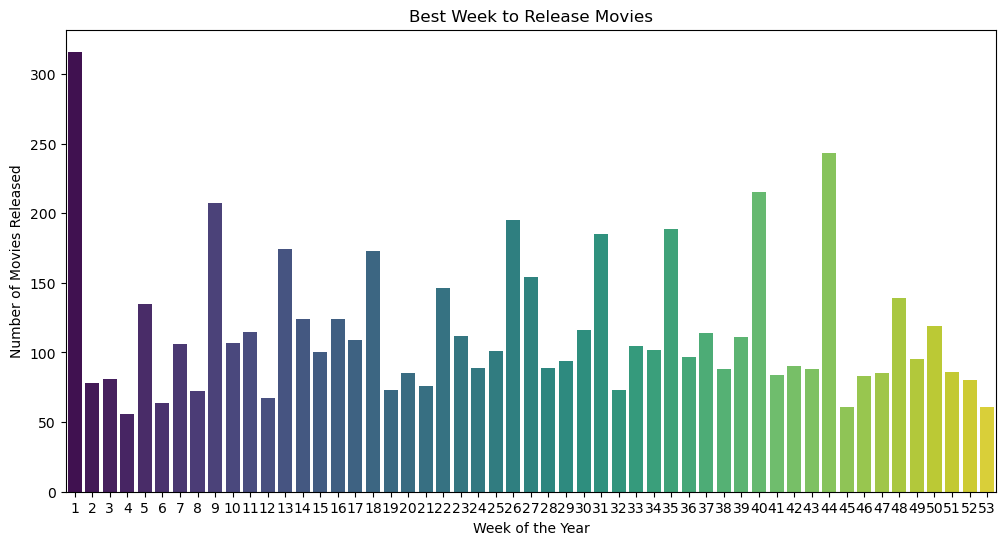

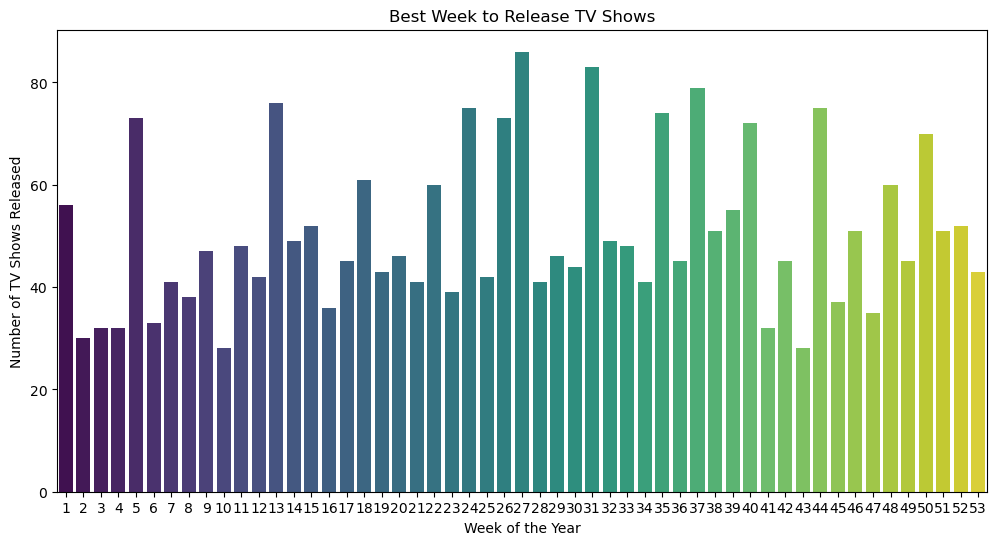

In [260]:
# Plotting the best week to release movies
plt.figure(figsize=(12, 6))
sns.barplot(x=movies_by_week.index, y=movies_by_week.values, palette='viridis')
plt.title('Best Week to Release Movies')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Movies Released')
plt.show()

# Plotting the best week to release TV shows
plt.figure(figsize=(12, 6))
sns.barplot(x=tv_shows_by_week.index, y=tv_shows_by_week.values, palette='viridis')
plt.title('Best Week to Release TV Shows')
plt.xlabel('Week of the Year')
plt.ylabel('Number of TV Shows Released')
plt.show()


In [237]:
# Unnesting the 'Director' column
df_directors = df_grouped.assign(Director=df_grouped['Director'].str.split(', ')).explode('Director')

# Unnesting the 'Cast' column
df_cast = df_grouped.assign(Cast=df_grouped['Cast'].str.split(', ')).explode('Cast')

# Group by director and count the number of unique titles
top_directors = df_directors.groupby('Director')['title'].nunique().sort_values(ascending=False).head(10)

# Group by actor and count the number of unique titles
top_actors = df_cast.groupby('Cast')['title'].nunique().sort_values(ascending=False).head(10)


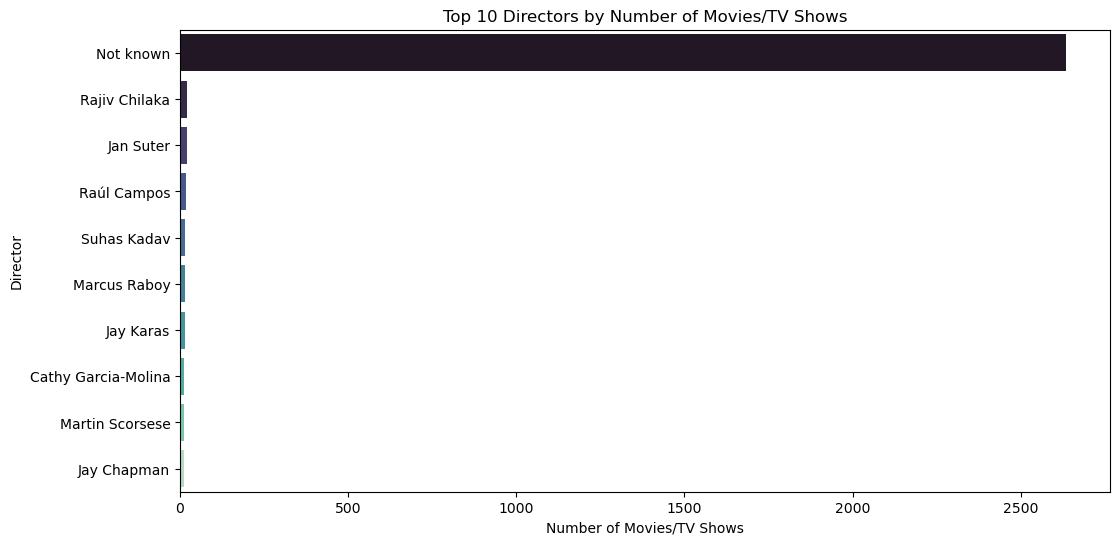

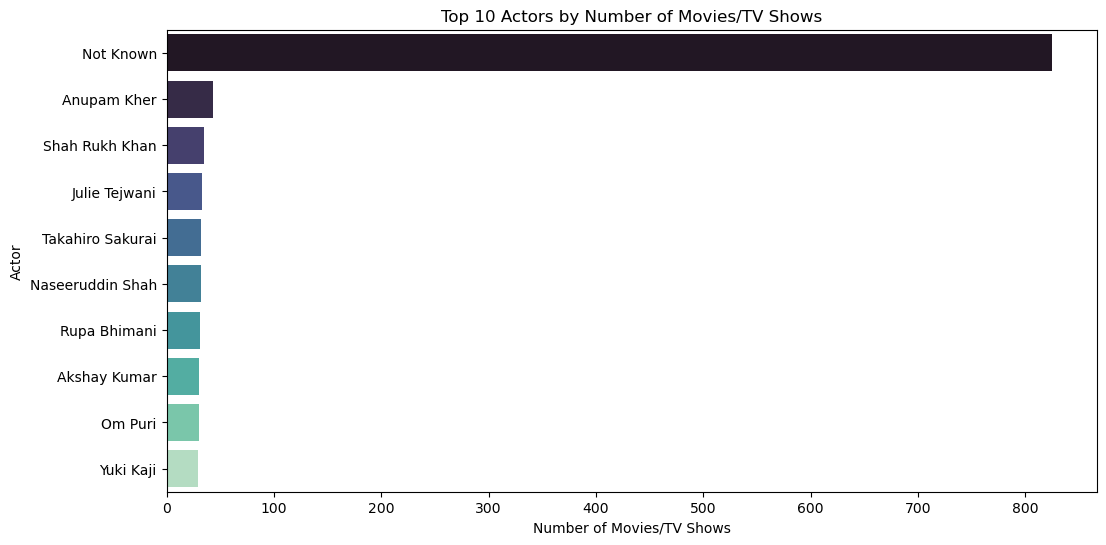

In [239]:
# Group by director and count the number of unique titles
top_directors = df_directors.groupby('Director')['title'].nunique().sort_values(ascending=False).head(10)

# Group by actor and count the number of unique titles
top_actors = df_cast.groupby('Cast')['title'].nunique().sort_values(ascending=False).head(10)

# Plotting the top 10 directors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='mako')
plt.title('Top 10 Directors by Number of Movies/TV Shows')
plt.xlabel('Number of Movies/TV Shows')
plt.ylabel('Director')
plt.show()

# Plotting the top 10 actors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='mako')
plt.title('Top 10 Actors by Number of Movies/TV Shows')
plt.xlabel('Number of Movies/TV Shows')
plt.ylabel('Actor')
plt.show()

In [240]:
!pip install wordcloud
from wordcloud import WordCloud

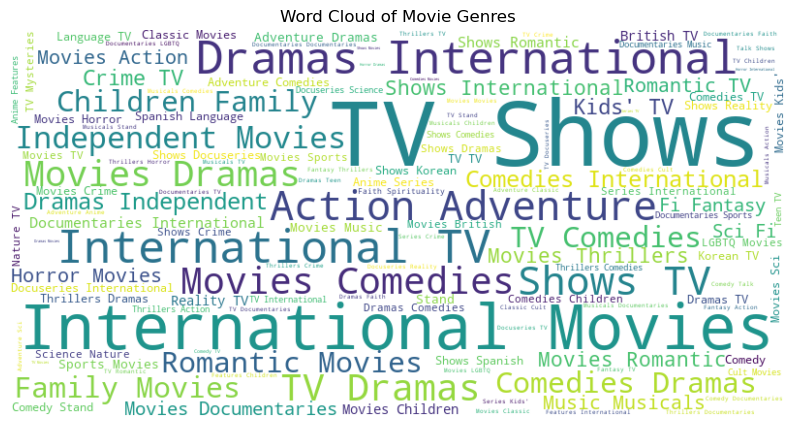

In [242]:
all_genres = ' '.join(df_grouped['listed_in'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Genres')
plt.show()

In [273]:
df_grouped["listed_in"].value_counts()

Dramas, International Movies                                              362
Documentaries                                                             359
Stand-Up Comedy                                                           334
Comedies, Dramas, International Movies                                    274
Dramas, Independent Movies, International Movies                          252
                                                                         ... 
Docuseries, Kids' TV, Science & Nature TV                                   1
Action & Adventure, Sci-Fi & Fantasy, Thrillers                             1
TV Action & Adventure                                                       1
British TV Shows, International TV Shows, Stand-Up Comedy & Talk Shows      1
Cult Movies, Dramas, Music & Musicals                                       1
Name: listed_in, Length: 514, dtype: int64

In [277]:
df_grouped['listed_in'] = df_grouped['listed_in'].str.split(', ')
df_genre = df_grouped.explode('listed_in')

# Count the occurrences of each genre
genre_counts = df_genre['listed_in'].value_counts()

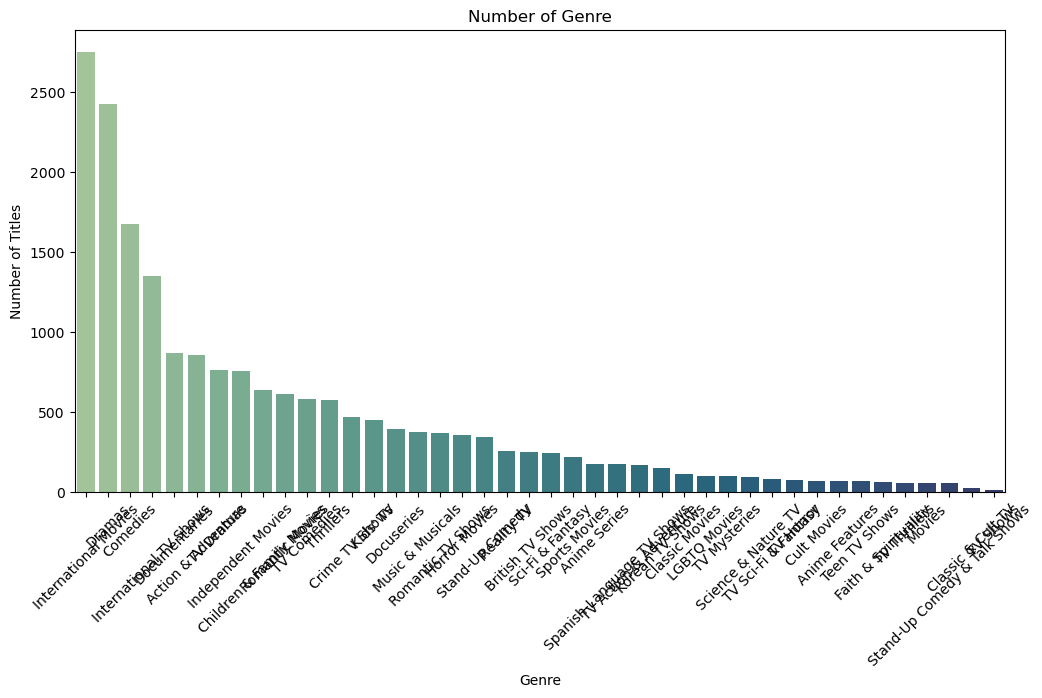

In [280]:
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='crest')
plt.title('Number of Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

In [243]:
df_grouped['date_added'] = pd.to_datetime(df_new['date_added'])

# Calculate the difference in days between 'Date_added' and 'Release_year'
df_grouped['Days_to_Netflix'] = (df_grouped['date_added'] - pd.to_datetime(df_grouped['release_year'], format='%Y')).dt.days

# Get the mode (most common value) of the 'Days_to_Netflix' column
mode_days_to_netflix = df_grouped['Days_to_Netflix'].mode()[0]

In [244]:
df_grouped

,title,Director,Cast,Country,duration,release_year,rating,date_added,listed_in,type,Week,Month,Days_to_Netflix
0,#Alive,Cho Il,"Park Shin-hye, Yoo Ah-in",South Korea,99 min,2020,TV-MA,2021-09-25,"Horror Movies, International Movies, Thrillers",Movie,37,9,633
1,#AnneFrank - Parallel Stories,"Anna Migotto, Sabina Fedeli","Helen Mirren, Gengher Gatti",Italy,95 min,2019,TV-14,2021-09-24,"Documentaries, International Movies",Movie,27,7,997
2,#FriendButMarried,Rako Prijanto,"Beby Tsabina, Sari Nila, Vanesha Prescilla, Re...",Indonesia,102 min,2018,TV-G,2021-09-24,"Dramas, International Movies, Romantic Movies",Movie,21,5,1362
3,#FriendButMarried 2,Rako Prijanto,"Vonny Cornellya, Sari Nila, Mawar de Jongh, Ad...",Indonesia,104 min,2020,TV-G,2021-09-24,"Dramas, International Movies, Romantic Movies",Movie,26,6,632
4,#Roxy,Michael Kennedy,"Booboo Stewart, Jake Short, Sarah Fisher, Pipp...",Canada,105 min,2018,TV-14,2021-09-24,"Comedies, Romantic Movies",Movie,15,4,1362
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,忍者ハットリくん,Not known,Not Known,Japan,2 Seasons,2012,TV-Y7,2021-06-02,"Anime Series, Kids' TV",TV Show,51,12,3440
8803,海的儿子,Not known,"Jeanette Aw, Apple Hong, Christopher Lee, Jess...",nan,1 Season,2016,TV-14,2021-06-02,"International TV Shows, TV Dramas",TV Show,17,4,1979
8804,마녀사냥,Not known,"Dong-yup Shin, Sam Hammington, Se-yoon Yoo, Ji...",South Korea,1 Season,2015,TV-MA,2021-06-02,"International TV Shows, Korean TV Shows, Stand...",TV Show,8,2,2344
8805,반드시 잡는다,Hong-seon Kim,Baek Yoon-sik,South Korea,110 min,2017,TV-MA,2021-06-02,"Dramas, International Movies, Thrillers",Movie,9,2,1613


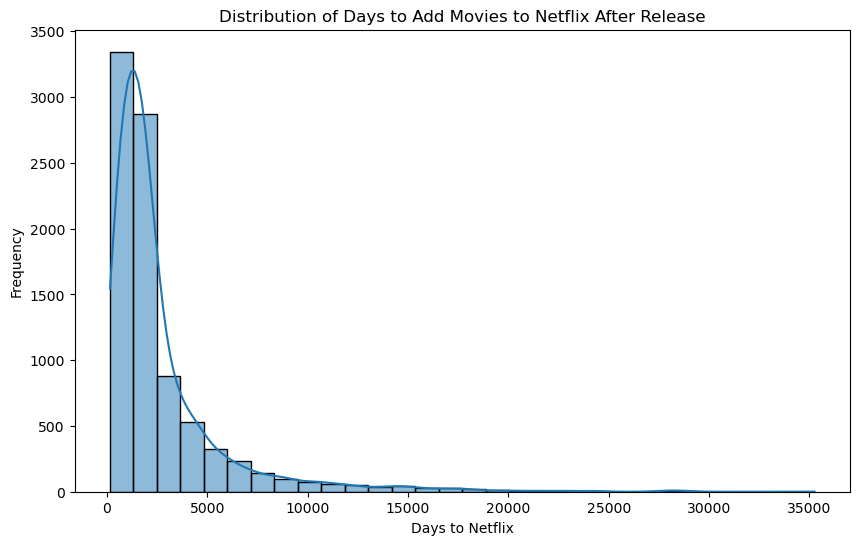

In [245]:
plt.figure(figsize=(10, 6))
sns.histplot(df_grouped['Days_to_Netflix'], kde=True, bins=30)
plt.title('Distribution of Days to Add Movies to Netflix After Release')
plt.xlabel('Days to Netflix')
plt.ylabel('Frequency')
plt.show()

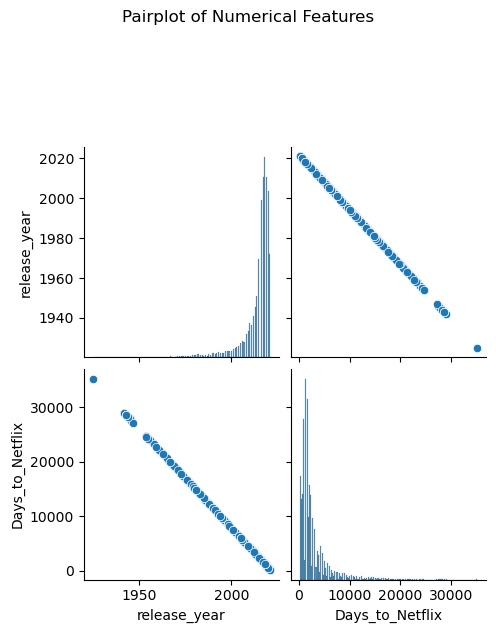

In [266]:
sns.pairplot(df_grouped[numerical_cols])
plt.suptitle('Pairplot of Numerical Features', y=1.25)
plt.show()

Observation: the movies that are released after 2017 were added much faster.

In [246]:
year=df_grouped["release_year"].value_counts().head(20).reset_index().sort_values(by="index") ## top 10
year

,index,release_year
19,2002,51
18,2003,61
17,2004,64
16,2005,80
14,2006,96
15,2007,88
13,2008,136
12,2009,152
10,2010,194
11,2011,185


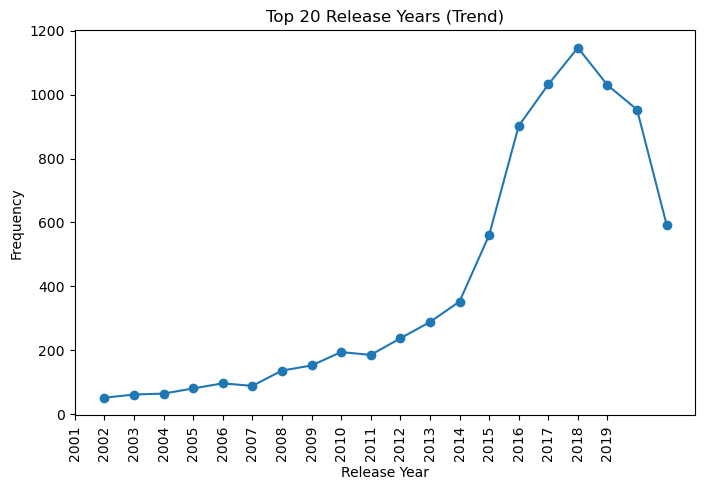

In [247]:
plt.figure(figsize=(8,5))
plt.plot(year['index'], year['release_year'], marker='o')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Top 20 Release Years (Trend)')
plt.xticks(list(range(2001,2020)),rotation=90)  # Rotate x-axis labels if needed
plt.grid(False)
plt.show()

In [269]:
df_rating = df_grouped[(df_grouped["release_year"] < 2020) & (df_grouped["release_year"] > 1900)]
df_rating =df_rating .head(2000)

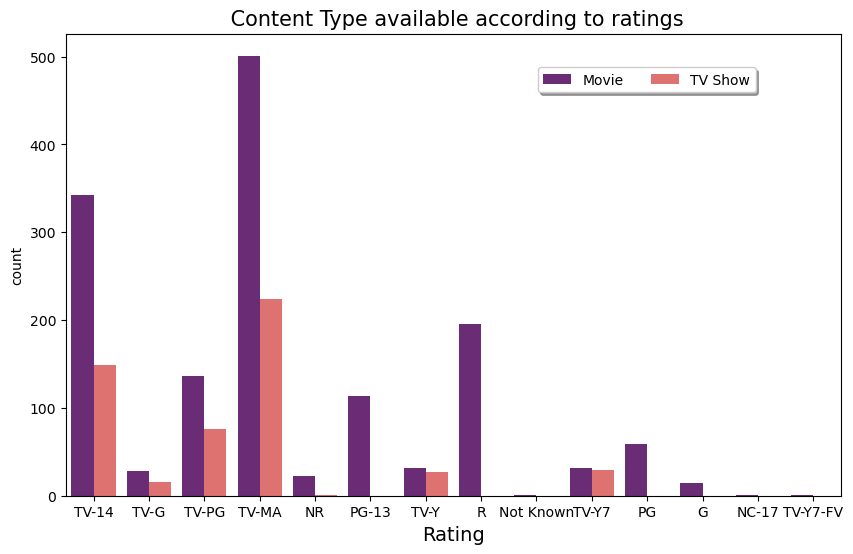

In [271]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(data=df_rating, x='rating', hue='type', palette='magma')
plt.title(' Content Type available according to ratings', fontsize=15)
plt.xlabel('Rating', fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(0.600,0.90),
          ncol=3, fancybox=True, shadow=True)
plt.show()

Business Insights:

Added Week, month, Days_ to_netflix columns for more deeper analysis.
Movies are significantly higher than the TV Shows.
United states produced most of the TV shows and Movies followed by India in Movies and Uk in TV Shows.
2018 is the year in which most of the Movies and TV shows were released.
It started showing upward trend from 2015 and peaked in late 2017.
December is the month in which mostly Movies and tv shows releases.
From word cloud we can see that most of the descriptions of the netflix content is about Action, adventure, Family, TV Shows and International TV.
Dramas, International Movies, Documentaries and Stand-Up Comedy are the top 3 Genres.
Most TV Show additions in 2019 occurred in November followed by October.
Most TV Show additions in 2020 occurred in December followed by May.
Most TV Show additions in 2021 occurred in July followed by June.
Best week to release Movies is the 1st week of the year followed by the 44th week.
Best week to TV shows is the 27th week of the year followed by the 31st week.
Highest no. of movies were added within 3 years from their actual release in theatres.
Mostly Tv shows and movies are of TV-MA rating i.e most of the content is for Mature audience.

Recommendations:

Final Recommendations:

The most popular Genres across the countries and in both TV Shows and Movies are Drama, Comedy and International TV Shows/Movies, so recommended to generate more content on these genres.

Add movies for Indian Audience, it has been declining since 2018.

Netflix shoud take into consideration the popular actors/directors for the respective countries. 

Also take into account the director-actor combination which is highly recommended.

For audience 80-120 mins is the recommended length for movies.

Netflix should also focus on adding more movies or TV Shows related to Dramas and International Movies.